### Task:3 Hyperparameter Tuning of ML Models
The objective of hyperparameter tuning in machine learning models is to optimize model performance by selecting the best set of hyperparameters.

In [1]:
# Tools and Prepration
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [2]:
data = pd.read_csv('emails.csv')
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
data['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
# check data type
data.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [6]:
# check nan values
data.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

### Data Visualization

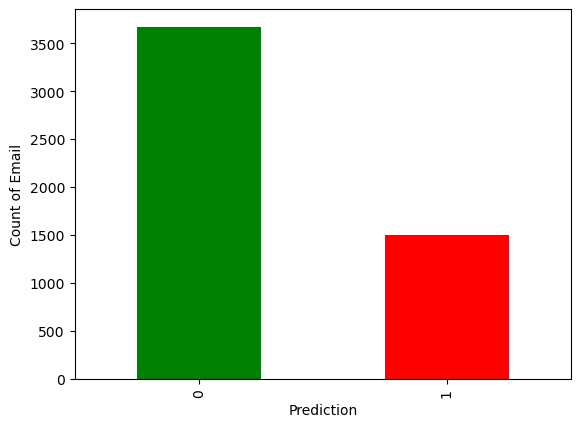

In [7]:
# let's look at the prediction
data['Prediction'].value_counts().plot(kind='bar',color=['green','red'])
plt.xlabel('Prediction')
plt.ylabel('Count of Email');

### Model Building:¶

In [8]:
data = data.drop('Email No.',axis=1)
# Split data
X = data.drop('Prediction',axis=1)
y = data['Prediction']

In [9]:
# Split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
# check the shape of the data
print('shape of x_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of x_train (4137, 3000)
shape of y_train (4137,)
shape of x_test (1035, 3000)
shape of y_test (1035,)


In [18]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)

In [19]:
model.score(X_test,y_test)

0.9719806763285024

In [20]:
model.score(X_train,y_train)

0.9995165578921924

### Hyperparameter tuning using Randomized Serch CV

In [21]:
# We will select the parameters for these from the website.
#Define Your Hyperparameter Grid: First, define the range of hyperparameters you want to tune.
# Based on the Logistic Regression model.
# this is a logistic regression hp tune dictinuary
LR_Hp = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

# Create the RandomizedSearchCV object
lr = RandomizedSearchCV(LogisticRegression(),
                        param_distributions=LR_Hp,
                        cv=5,
                        n_iter=20,
                        verbose=True,
                        n_jobs=1)

# Fit the random hyperparameter search for lr
lr.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
# Get the best hyperparameters
print("Best Hyperparameters:", lr.best_params_)


Best Hyperparameters: {'solver': 'liblinear', 'C': 10000.0}


In [23]:
lr.score(X_test,y_test)

0.9710144927536232

In [24]:
# Lets tune the models with Grid SerchCV 
# Tune Logistic Regression
np.random.seed(7)
LR_Hp = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['liblinear'],  # Solvers
}
lr_gs = GridSearchCV(LogisticRegression(),
                        param_grid=LR_Hp,
                        cv=5,
                        verbose=True,
                        n_jobs=1)
# fit the Grid HP search for lr
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Computer Clinic\Desktop\cardio-project\venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [25]:
lr_gs.score(X_test,y_test)


0.9710144927536232

In [26]:
lr_gs.score(X_train,y_train)

0.9997582789460963

In [28]:
y_predict = lr_gs.predict(X_test)
y_predict

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [30]:
from sklearn.metrics import roc_curve
y_proba = lr_gs.predict_proba(X_test)
# calculate fpr tpr and threshold
y_prob_positive = y_proba[:,1]# yaha humne positive values utha li
fpr,tpr,threshold = roc_curve(y_test,y_prob_positive)

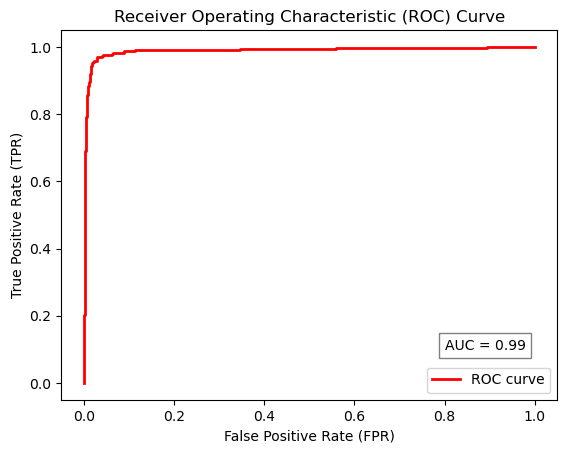

In [32]:
# Define a function for plotting ROC curve
from sklearn.metrics import auc
def plot_roc(fpr, tpr):
    # Plot ROC curve
    plt.plot(fpr, tpr, color="red",lw=2, label="ROC curve")
    auc_score = auc(fpr, tpr)
    plt.text(0.8, 0.1, f'AUC = {auc_score:.2f}', bbox=dict(facecolor='white', alpha=0.5))

    # Customize the plot
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend(loc='lower right')
    plt.show()
plot_roc(fpr, tpr)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report 
confusion_matrix(y_test,y_predict)

array([[722,  17],
       [ 13, 283]], dtype=int64)

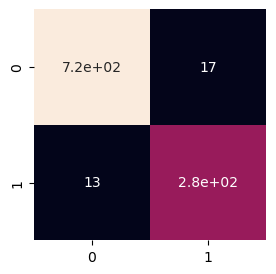

In [37]:
def plot_confusion(y_test,y_predict):
    "This is plot the confusion matrix"
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict),
                  annot=True,
                  cbar=False)
plot_confusion(y_test,y_predict)